In [58]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

In [3]:
np.random.seed(0) # Using random.seed function from numpy library to generate the same random datapoints on every code run

In [4]:
# Initializing given means and covariances of four gaussian distributions
mu1 = [2, 2]
sigma1 = [[0.9, -0.0255], [-0.0255, 0.9]]
mu2 = [5, 5]
sigma2 = [[0.5, 0], [0, 0.3]]
mu3 = [-2, -2]
sigma3 = [[1, 0], [0, 0.9]]
mu4 = [-4, 8]
sigma4 = [[0.8, 0], [0, 0.6]]

In [5]:
# Generating synthetic data by drawing samples from each distribution
data1 = np.random.multivariate_normal(mu1,sigma1,200)
data2 = np.random.multivariate_normal(mu2,sigma2,200)
data3 = np.random.multivariate_normal(mu3,sigma3,200)
data4 = np.random.multivariate_normal(mu4,sigma4,200)
#print(data1)

In [6]:
# Combining all datapoints in one dataset
data = np.vstack((data1,data2,data3,data4))
#print(data)

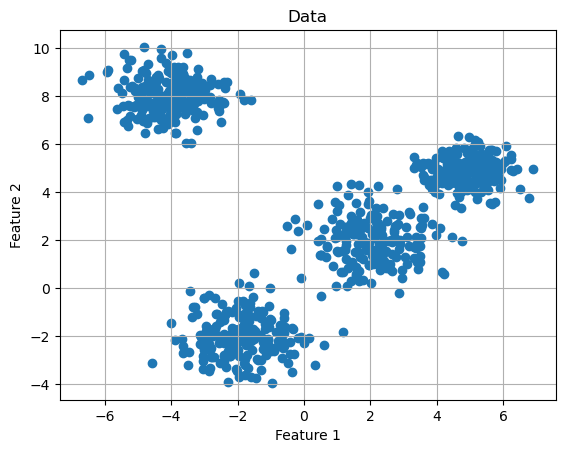

In [47]:
# Creating a scatter plot of the datapoints before applying K-means clustering
plt.scatter(data[:, 0], data[:, 1])
plt.title('Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

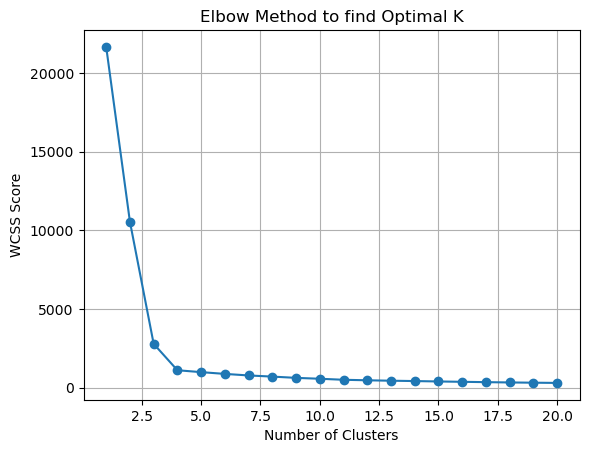

In [59]:
wcss = []  # List to store WCSS values
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn') # To ignore warnings due to Windows usage
# Looping over k from 1 to 20
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
# print(wcss)


# Plotting the WCSS for different number of clusters
plt.plot(range(1, 21), wcss, marker='o', linestyle='-')
plt.title('Elbow Method to find Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')
plt.grid()
plt.show()

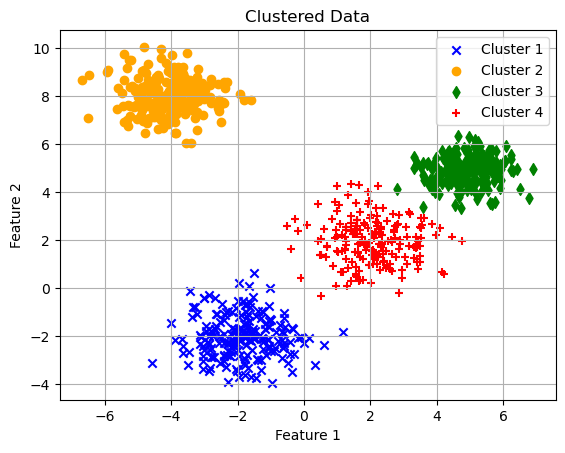

In [56]:
# Performing K-Means clustering with 4 clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=0)
kmeans.fit(data)
clusters=kmeans.fit_predict(data)

# Plotting the datapoints after K-means clustering 
colors = ['blue', 'orange', 'green', 'red']
markers = ['x', 'o', 'd', '+']
labels = [f'Cluster {i+1}' for i in range(optimal_k)]

for i in range(optimal_k):
    plt.scatter(data[clusters == i, 0], data[clusters == i, 1], c=colors[i], marker=markers[i], label=labels[i])

plt.title('Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

## Report

### Q1: What might happen if the value of the number of clusters is set too high or too low in K-Means?

Ans. If the value of the number of clusters is too high then it will lead to overfitting of the model i.e there will be a lot of clusters out of which some might not represent meaningful information and contribute to noise or outliers.
If the value of the number of clusters is too low then the model will fail to capture the inherent structure in the data since most of the clusters would be merged to one.

### Q2: What is the effect of initializing centroids far apart or too close together in K-Means, and how might this affect the final clustering?

Ans. If centroids are far apart in K-Means, then it might lead to the faster convergence, but if the initial centroids are poorly placed, it would definitely lead to suboptimal results.
If centroids are too close to each other, it might converge to a local minimum leading to poor separation of clusters. This can further lead to the creation of clusters that are too similar to each other and also the algorithm might fail to explore the entire space.

### Q3: How might you optimise the centroid initialization to lead to better clustering?

Ans. We can use KMeans++ algorithm which serves the purpose of centroid intialization. It spreads out the initial centroids by giving a pseudo random start instead of giving just a random start. One good way is to place the first mean on the top of a randomly chosen data point in a corner, then put the second mean on a datapoint that is as far away as possible from the first mean and so on. This helps in putting initial means around all the corners formed by the datapoints.

### Q4: Why might the Elbow Method not always provide a clear solution for choosing the optimal number of clusters?

Ans. Sometimes the Elbow method may not be apparent.  In any case, Elbow method only works for K-means since it evaluates the WCSS distance. This can be problematic in case of clustering in general i.e evaluating K for clustering in general. In cases such as if the data is noisy or if there isn't a clear clustering structure, then it might not show a clear bend or drop.

### Q5: How can WCSS be influenced by the presence of outliers or noise in the data?

Ans. Outliers or noise in the data can misrepresent the WCSS value by creating large distances between data points and the cluster centroids, which increases the sum of squared distances. This can ultimately make the model less effective, and the WCSS value would be higher than it would be without noise or outliers.